<a href="https://colab.research.google.com/github/jitendra19/stock-market-prediction/blob/main/BitsPilaniDessertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
# from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [86]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    # data = DataReader.get_data_yahoo(stock, start=start, end=end)
    # globals()[stock] = DataReader(stock, 'yahoo', start='2019-09-10', end='2019-10-09')
    ticker = yf.Ticker(stock)
    globals()[stock] = ticker.history(period="1y", auto_adjust=True)
    # print(stock)    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

In [88]:
#new Column in DataFRAME
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

print('combined all data together in DF')
df = pd.concat(company_list, axis=0)
df.head(10)


combined all data together in DF


,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name
Date,,,,,,,,
2020-12-04,121.848838,122.107247,120.775454,121.500984,78260400,0.0,0,APPLE
2020-12-07,121.560604,123.806759,121.500974,122.991783,86712000,0.0,0,APPLE
2020-12-08,123.607987,124.214250,122.335823,123.617920,82225500,0.0,0,APPLE
2020-12-09,123.766995,125.178292,120.258624,121.033844,115089200,0.0,0,APPLE
2020-12-10,119.761692,123.111046,119.413838,122.484901,81312200,0.0,0,APPLE
2020-12-11,121.679863,122.007842,119.811384,121.659988,86939800,0.0,0,APPLE
2020-12-14,121.848819,122.594224,120.795317,121.033844,79184500,0.0,0,APPLE
2020-12-15,123.578162,127.116355,123.369450,127.096474,157243700,0.0,0,APPLE
2020-12-16,126.629358,127.583468,125.784560,127.026901,98208600,0.0,0,APPLE


In [89]:
df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name
Date,,,,,,,,
2021-11-19,3712.689941,3762.149902,3675.719971,3676.570068,4936700,0.0,0,AMAZON
2021-11-22,3676.379883,3713.459961,3567.500000,3572.570068,4842200,0.0,0,AMAZON
2021-11-23,3585.040039,3621.050049,3527.709961,3580.040039,3690200,0.0,0,AMAZON
2021-11-24,3562.669922,3613.639893,3536.850098,3580.409912,2328000,0.0,0,AMAZON
2021-11-26,3602.100098,3633.500000,3504.149902,3504.560059,2991300,0.0,0,AMAZON
2021-11-29,3547.639893,3596.000000,3531.500000,3561.570068,3265600,0.0,0,AMAZON
2021-11-30,3563.500000,3585.770020,3492.010010,3507.070068,4001100,0.0,0,AMAZON
2021-12-01,3545.000000,3559.879883,3441.600098,3443.719971,3745800,0.0,0,AMAZON
2021-12-02,3460.000000,3492.699951,3423.750000,3437.360107,3236300,0.0,0,AMAZON


In [90]:
AAPL.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,252.0
mean,136.900130,138.312965,135.540294,136.996988,9.047222e+07,0.003433,0.0
std,11.302995,11.429399,11.348491,11.444399,2.903524e+07,0.027094,0.0
min,118.477481,119.841116,115.670565,115.819870,4.100000e+07,0.000000,0.0
25%,127.221536,128.046003,125.824289,127.013718,6.979622e+07,0.000000,0.0
50%,134.879732,135.829539,133.044546,134.298164,8.599895e+07,0.000000,0.0
75%,146.805658,148.281721,145.567544,146.618523,1.052625e+08,0.000000,0.0
max,167.479996,170.300003,164.529999,165.300003,1.925415e+08,0.220000,0.0


In [91]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-12-04 to 2021-12-03
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Dividends     252 non-null    float64
 6   Stock Splits  252 non-null    int64  
 7   company_name  252 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 17.7+ KB


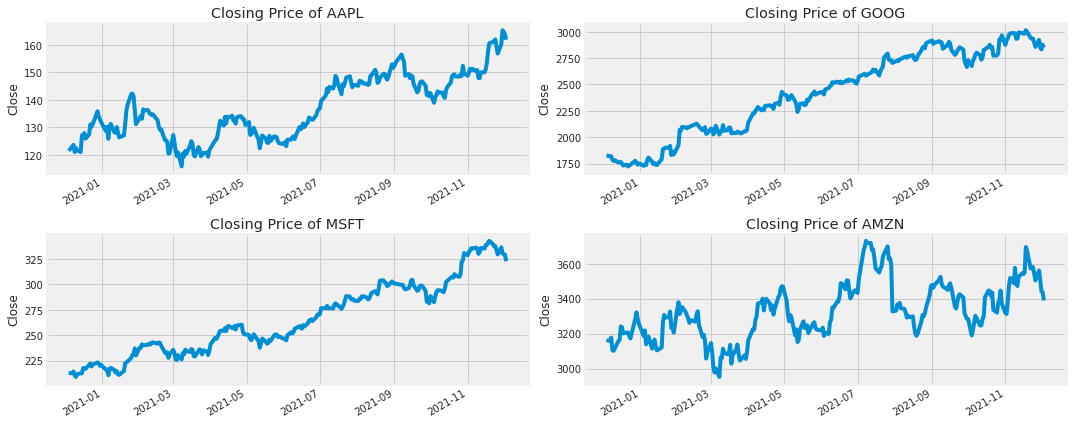

In [92]:
# Let's see a historical view of the closing price

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

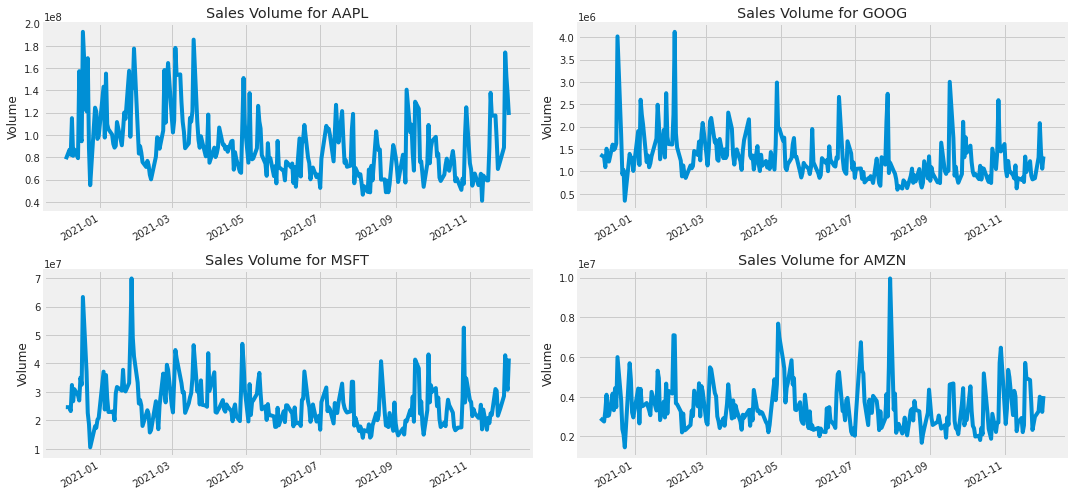

In [93]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# What was the moving average of the various stocks?


In [94]:
ma_day = [10, 20, 50, 100, 200]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

print(GOOG.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'company_name', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days',
       'MA for 100 days', 'MA for 200 days'],
      dtype='object')


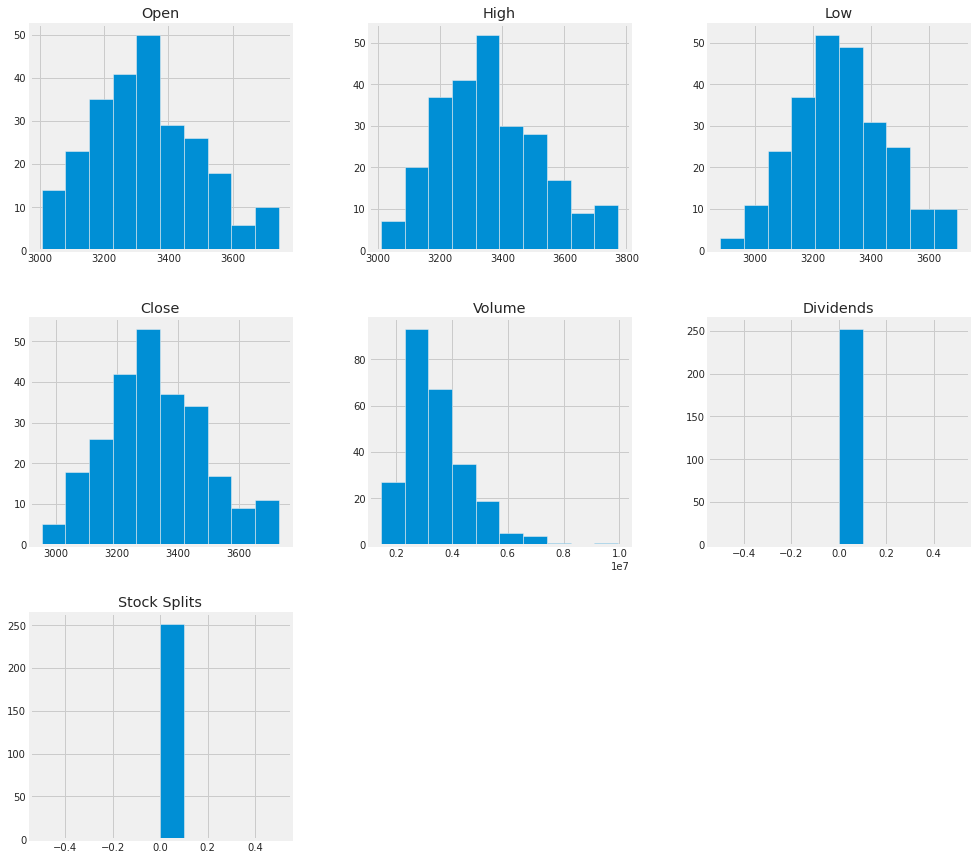

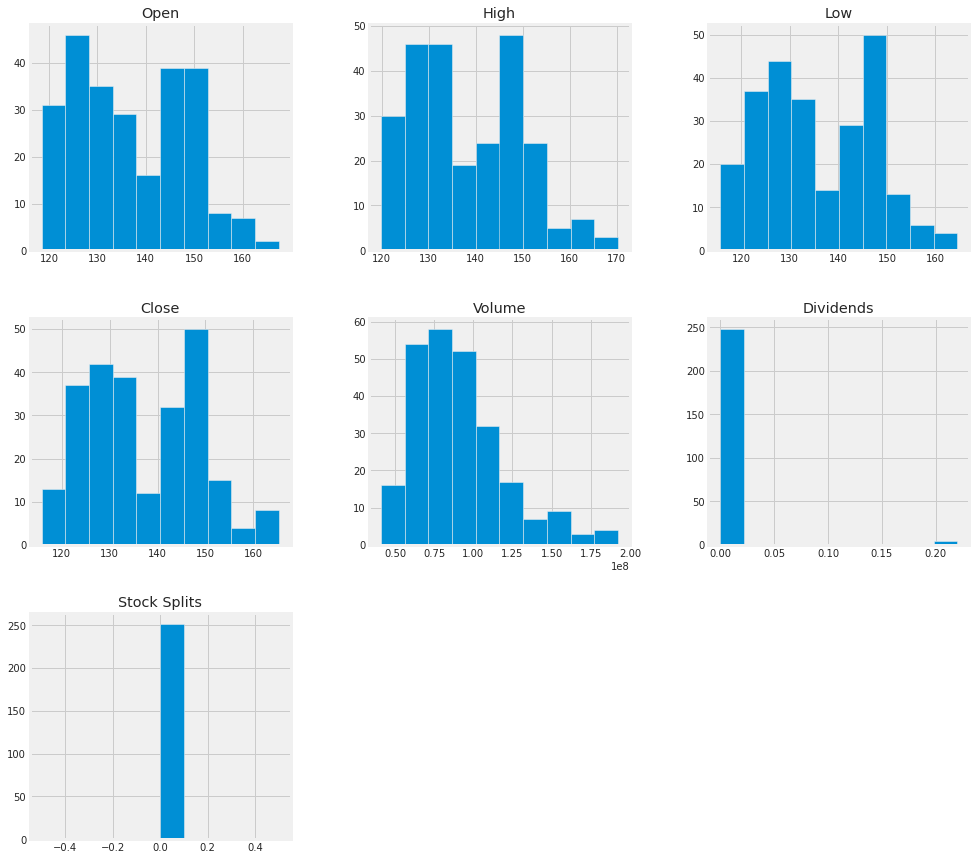

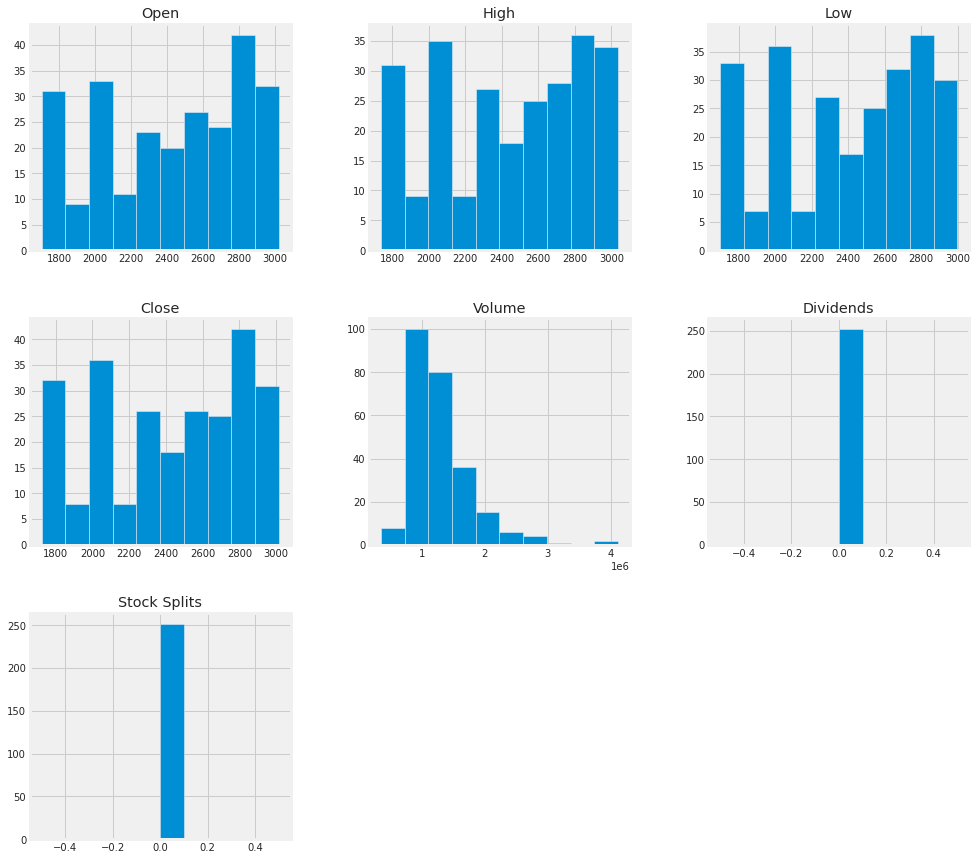

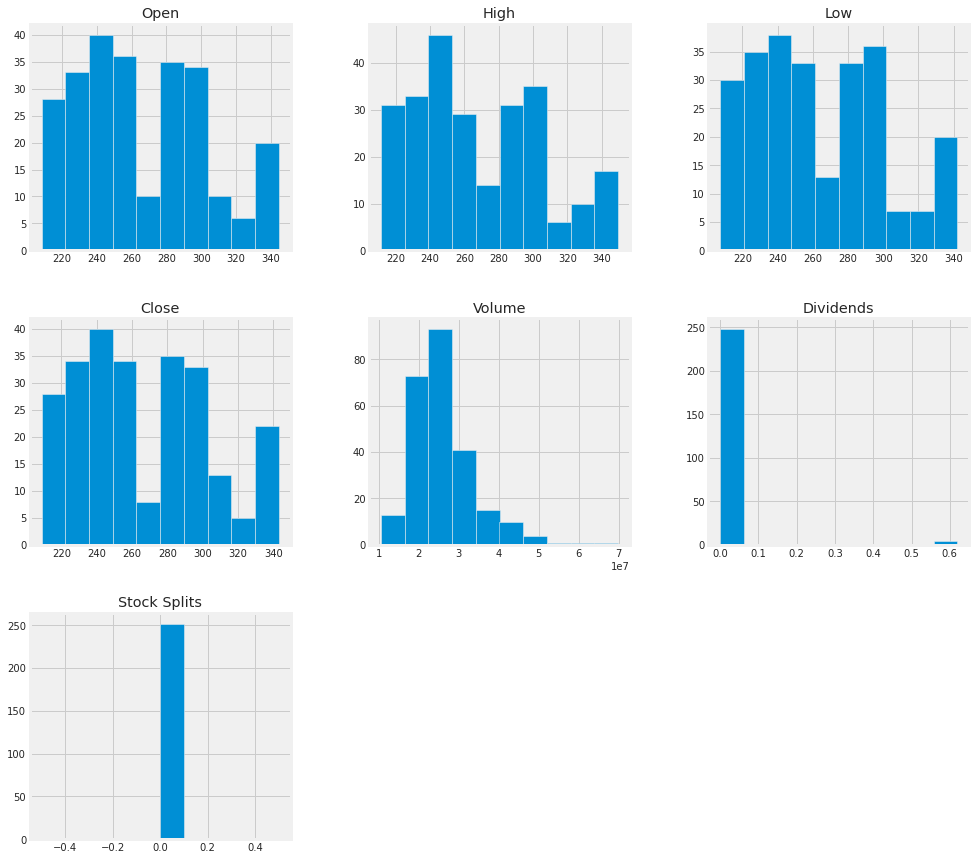

In [96]:
df.groupby("company_name").hist(figsize=(15, 15));

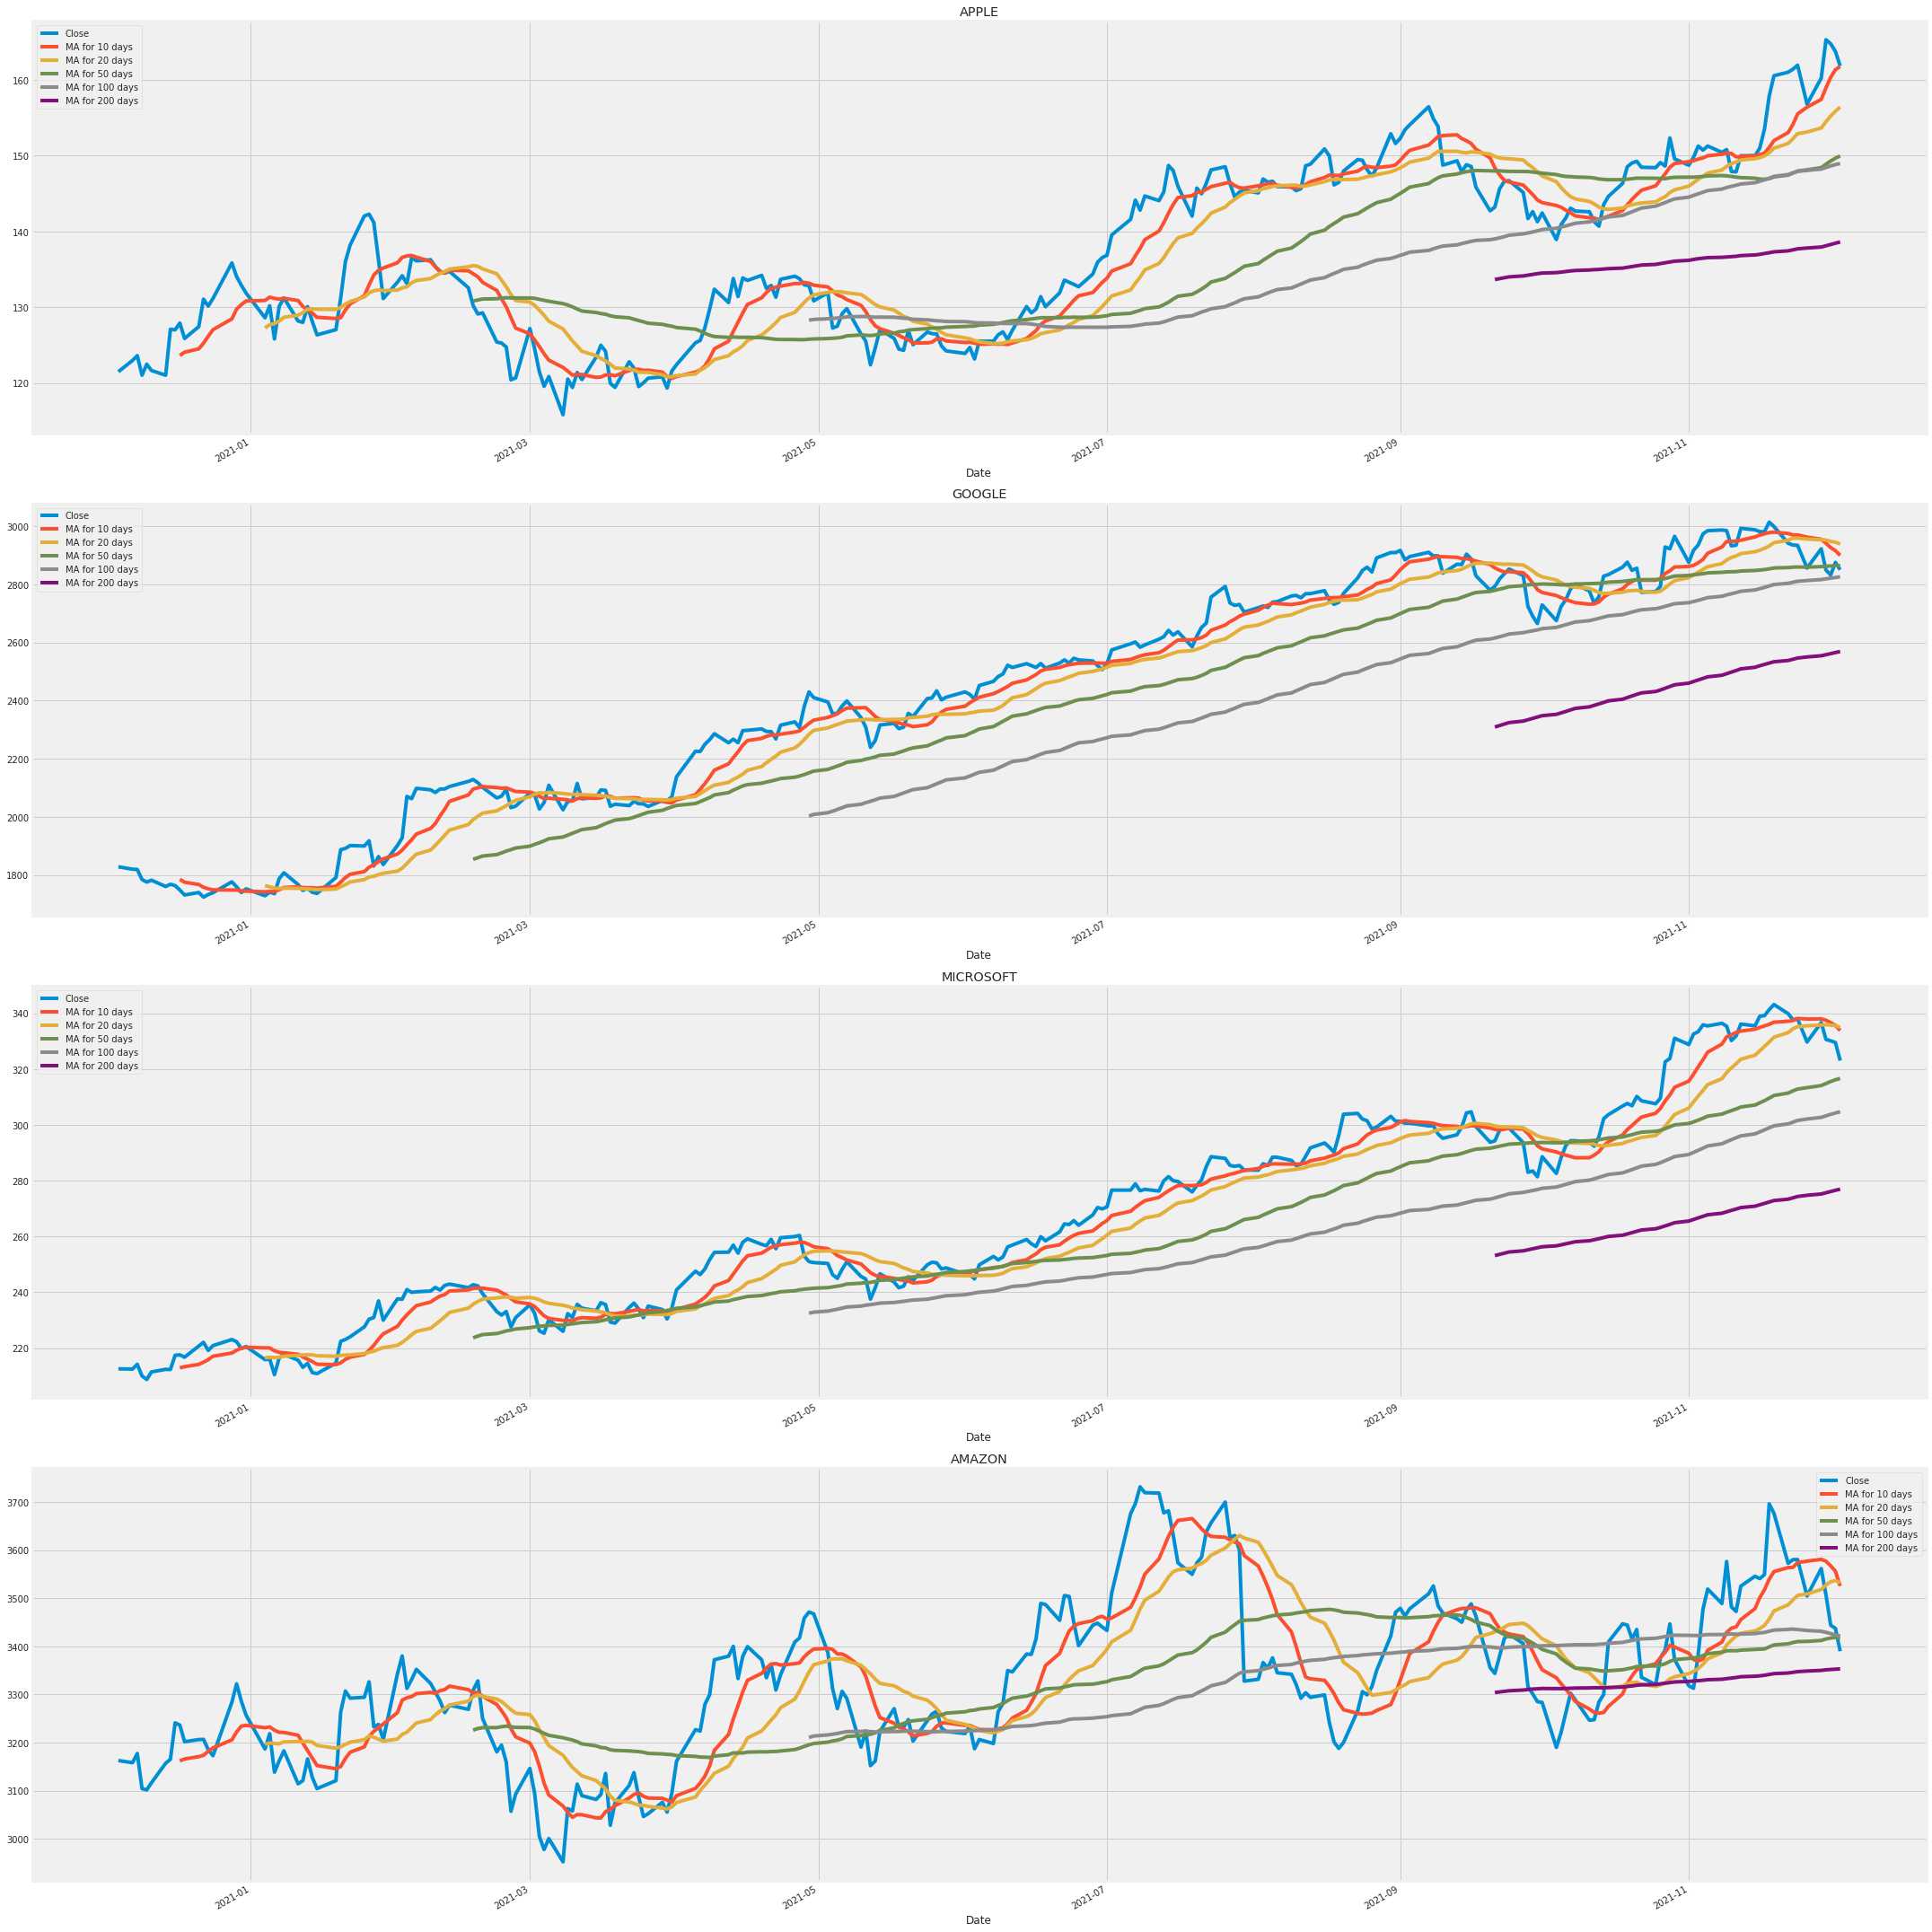

In [113]:
fig, axes = plt.subplots(nrows=4, ncols=1)
fig.set_figheight(30)
fig.set_figwidth(30)
args = ['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']

AAPL[args].plot(ax=axes[0])
axes[0].set_title('APPLE')

GOOG[args].plot(ax=axes[1])
axes[1].set_title('GOOGLE')

MSFT[args].plot(ax=axes[2])
axes[2].set_title('MICROSOFT')

AMZN[args].plot(ax=axes[3])
axes[3].set_title('AMAZON')

fig.tight_layout()

# What was the daily return of the stock on average?

In [114]:
# We'll use pct_change to find the percent change for each day
# Percentage change between the current and a prior element.
# Computes the percentage change from the immediately previous row by
# default. This is useful in comparing the percentage of change in a time
# series of elements.
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

AAPL.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,MA for 200 days,Daily Return
Date,,,,,,,,,,,,,,
2020-12-04,121.848838,122.107247,120.775454,121.500984,78260400,0.0,0,APPLE,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-07,121.560604,123.806759,121.500974,122.991783,86712000,0.0,0,APPLE,NaN,NaN,NaN,NaN,NaN,0.012270
2020-12-08,123.607987,124.214250,122.335823,123.617920,82225500,0.0,0,APPLE,NaN,NaN,NaN,NaN,NaN,0.005091
2020-12-09,123.766995,125.178292,120.258624,121.033844,115089200,0.0,0,APPLE,NaN,NaN,NaN,NaN,NaN,-0.020904
2020-12-10,119.761692,123.111046,119.413838,122.484901,81312200,0.0,0,APPLE,NaN,NaN,NaN,NaN,NaN,0.011989


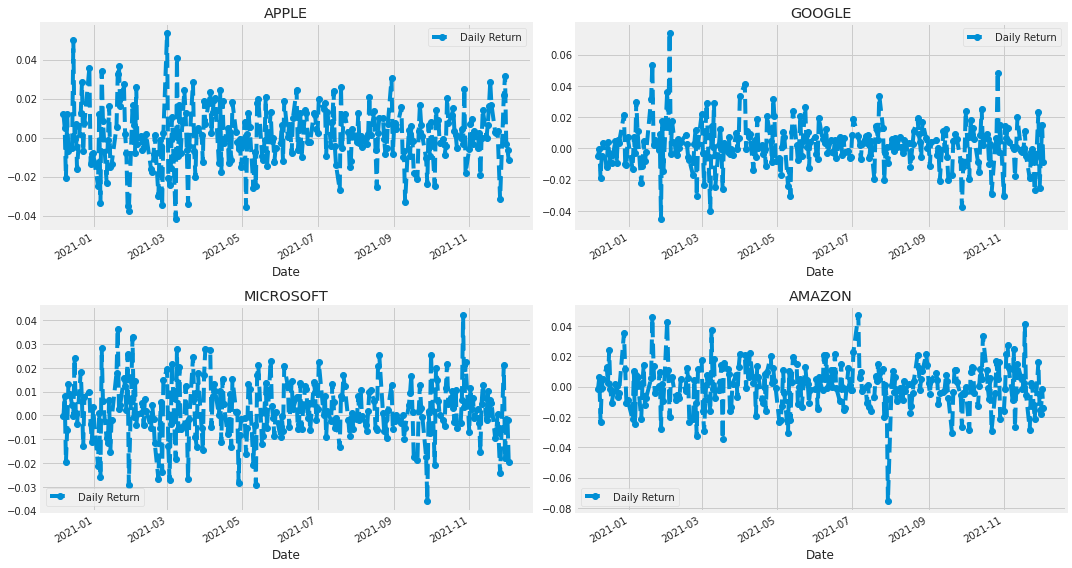

In [115]:
# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

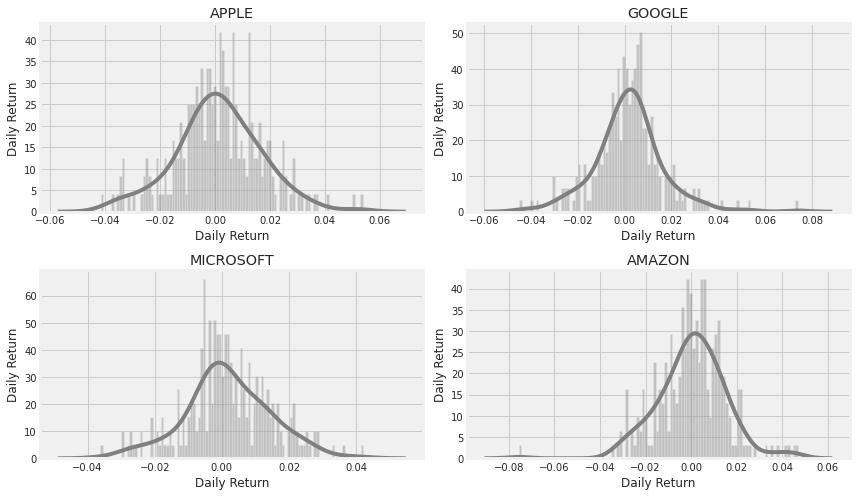

In [119]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='grey')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
# AAPL['Daily Return'].hist()
plt.tight_layout()

# What was the correlation between different stocks closing prices?


In [120]:
# Grab all the closing prices for the tech stock list into one DataFrame
# closing_df = DataReader(tech_list, 'yahoo', start, end)['Close']

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# for stock in tech_list:   
#     # ticker = yf.Ticker(stock)
#     # globals()[stock] = ticker.history(period="max", auto_adjust=True)
#     newName = stock + 'Close';
#     hey = globals()[stock].rename({'Close': 'stock'})
#     print(hey.head())

# horizontal_stack = pd.concat([closing_df['AAPL'], closing_df['GOOG']], axis=1)
# horizontal_stack = pd.concat([AAPL['Close'], GOOG['Close']], axis=1)

horizontal_stack = pd.concat([AAPL, GOOG, MSFT, AMZN], axis=1)['Close']

# Let's take a quick look
horizontal_stack = horizontal_stack.set_axis(tech_list, axis=1, inplace=False)
horizontal_stack.tail() 

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-11-29,160.240005,2922.280029,336.630005,3561.570068
2021-11-30,165.300003,2849.040039,330.589996,3507.070068
2021-12-01,164.770004,2832.360107,330.079987,3443.719971
2021-12-02,163.759995,2875.530029,329.489990,3437.360107
2021-12-03,161.839996,2850.409912,323.010010,3389.790039


In [121]:
tech_rets = horizontal_stack.pct_change()
tech_rets.tail()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-11-29,0.021874,0.023164,0.021081,0.016267
2021-11-30,0.031578,-0.025063,-0.017943,-0.015302
2021-12-01,-0.003206,-0.005855,-0.001543,-0.018064
2021-12-02,-0.006130,0.015242,-0.001787,-0.001847
2021-12-03,-0.011724,-0.008736,-0.019667,-0.013839


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


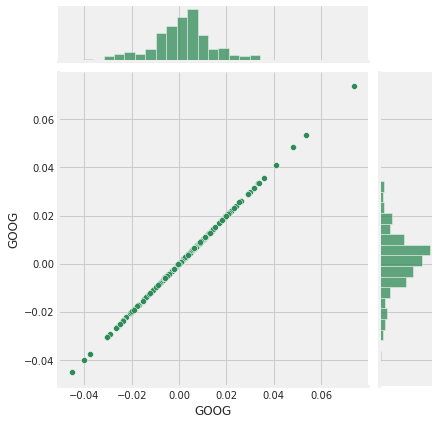

In [122]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


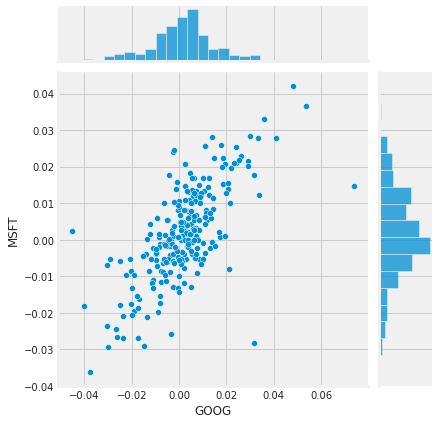

In [123]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

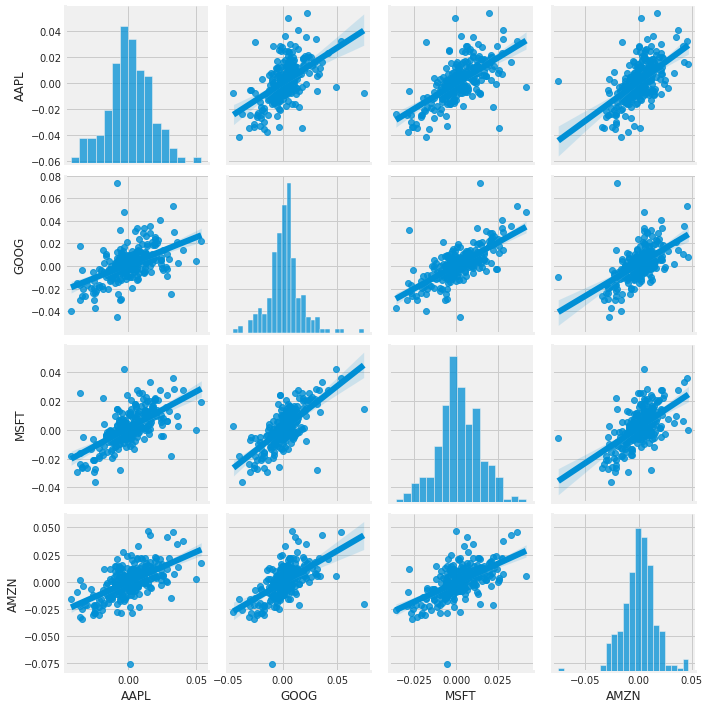

In [124]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

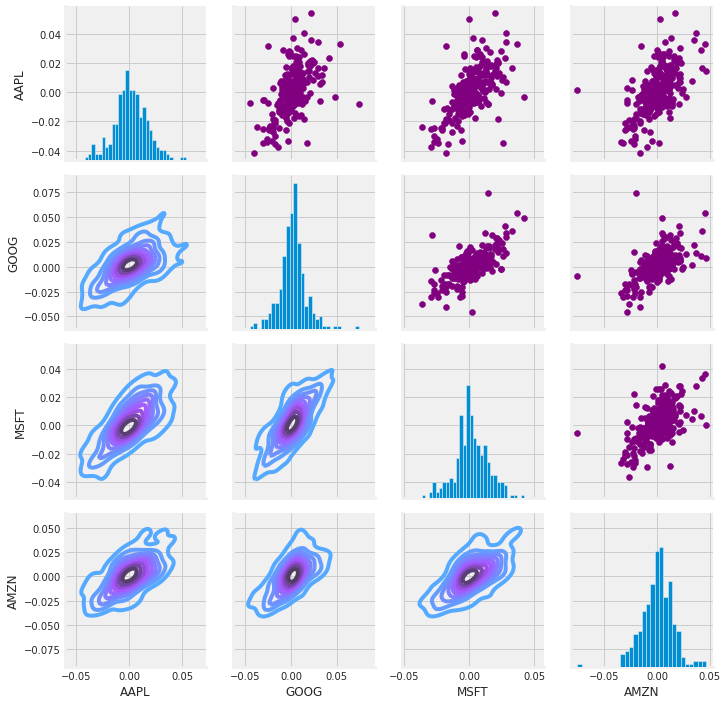

In [125]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

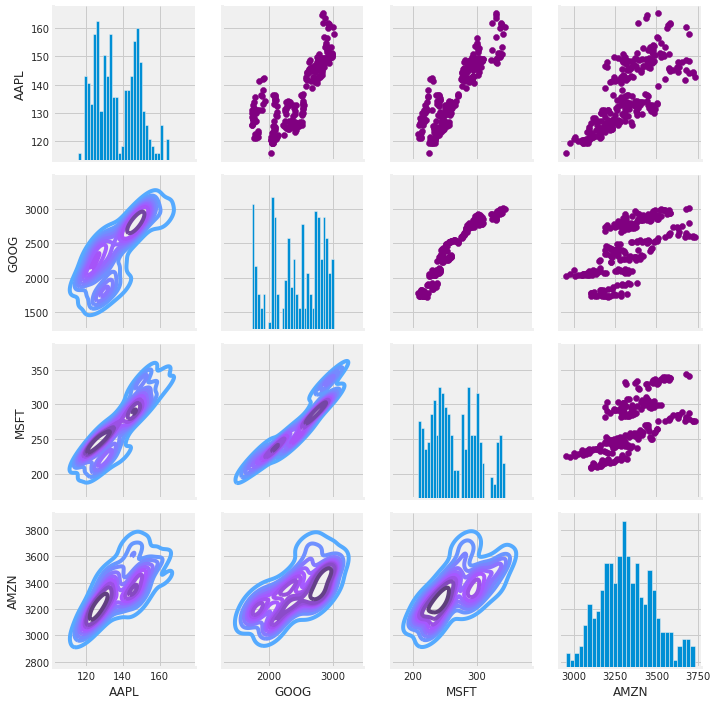

In [126]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(horizontal_stack)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

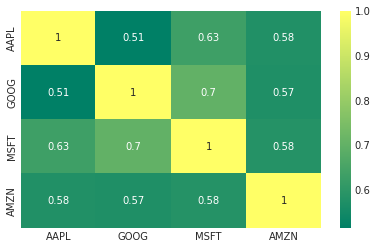

In [127]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

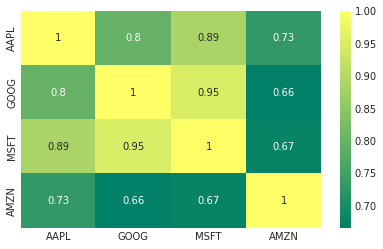

In [128]:
sns.heatmap(horizontal_stack.corr(), annot=True, cmap='summer')

# How much value do we put at risk by investing in a particular stock?

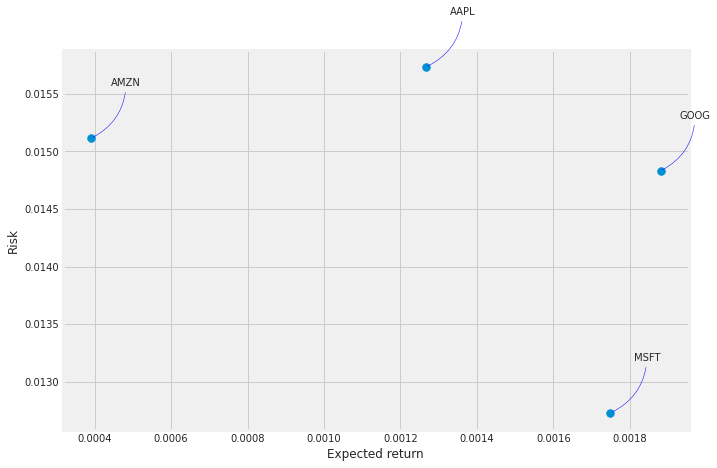

In [129]:
# There are many ways we can quantify risk, one of the most basic ways using the information 
# we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

#. Predicting the closing price stock price of APPLE inc:

In [130]:
# Get the stock quote

# df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
ticker = yf.Ticker('AAPL')
df = ticker.history(period="1y", auto_adjust=True)

# Show teh data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-04,121.848831,122.107240,120.775446,121.500977,78260400,0.0,0
2020-12-07,121.560604,123.806759,121.500974,122.991783,86712000,0.0,0
2020-12-08,123.607987,124.214250,122.335823,123.617920,82225500,0.0,0
2020-12-09,123.767002,125.178300,120.258632,121.033852,115089200,0.0,0
2020-12-10,119.761692,123.111046,119.413838,122.484901,81312200,0.0,0
...,...,...,...,...,...,...,...
2021-11-29,159.369995,161.190002,158.789993,160.240005,88748200,0.0,0
2021-11-30,159.990005,165.520004,159.919998,165.300003,174048100,0.0,0
2021-12-01,167.479996,170.300003,164.529999,164.770004,152052500,0.0,0


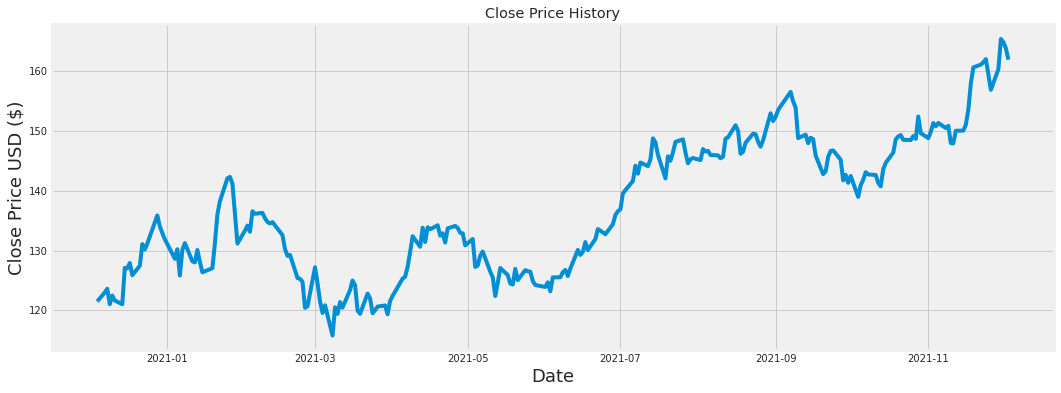

In [131]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [138]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

240

In [139]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.11481591],
       [0.14494531],
       [0.15759962],
       [0.10537525],
       [0.13470116],
       [0.11802956],
       [0.10537525],
       [0.2279018 ],
       [0.22649558],
       [0.24437233],
       [0.20339652],
       [0.23493183],
       [0.30824706],
       [0.28976726],
       [0.31005449],
       [0.40486257],
       [0.36830479],
       [0.34520574],
       [0.32451669],
       [0.25863362],
       [0.29077166],
       [0.20219136],
       [0.28896393],
       [0.31166116],
       [0.24999645],
       [0.24638129],
       [0.28836135],
       [0.24859054],
       [0.21303793],
       [0.22689724],
       [0.31125965],
       [0.40847773],
       [0.45266735],
       [0.52999972],
       [0.53482066],
       [0.51272539],
       [0.41289654],
       [0.30985373],
       [0.35364184],
       [0.37071542],
       [0.34962454],
       [0.41892264],
       [0.41037305],
       [0.41339057],
       [0.39528545],
       [0.38281356],
       [0.37758339],
       [0.382

In [140]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.11481591, 0.14494531, 0.15759962, 0.10537525, 0.13470116,
       0.11802956, 0.10537525, 0.2279018 , 0.22649558, 0.24437233,
       0.20339652, 0.23493183, 0.30824706, 0.28976726, 0.31005449,
       0.40486257, 0.36830479, 0.34520574, 0.32451669, 0.25863362,
       0.29077166, 0.20219136, 0.28896393, 0.31166116, 0.24999645,
       0.24638129, 0.28836135, 0.24859054, 0.21303793, 0.22689724,
       0.31125965, 0.40847773, 0.45266735, 0.52999972, 0.53482066,
       0.51272539, 0.41289654, 0.30985373, 0.35364184, 0.37071542,
       0.34962454, 0.41892264, 0.41037305, 0.41339057, 0.39528545,
       0.38281356, 0.37758339, 0.38241112, 0.33855794, 0.2912845 ,
       0.26855304, 0.27177132, 0.19392133, 0.19110503, 0.18084592,
       0.09313865, 0.09857003, 0.22992957, 0.17621911, 0.11466311])]
[0.07583841392900448]

[array([0.11481591, 0.14494531, 0.15759962, 0.10537525, 0.13470116,
       0.11802956, 0.10537525, 0.2279018 , 0.22649558, 0.24437233,
       0.20339652, 0.23493183, 0.30

In [141]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

180/180 [==============================] - 9s 33ms/step - loss: 0.0112


In [142]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5.328649487925586

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


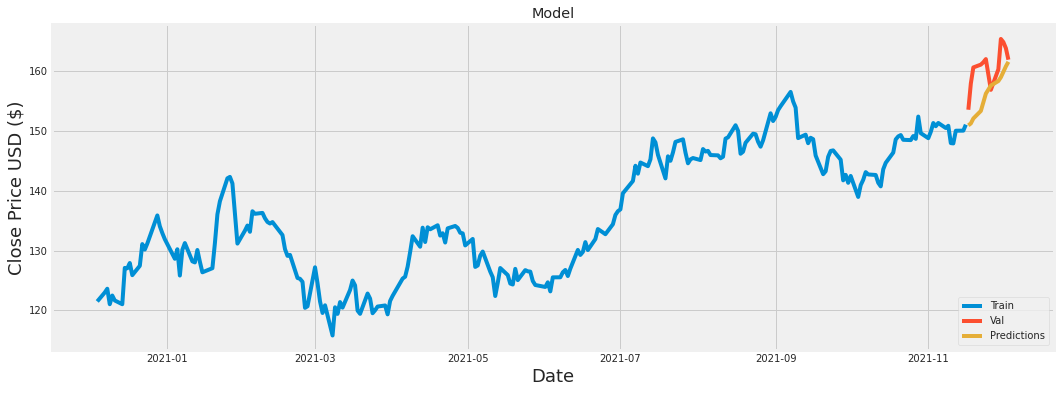

In [143]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [144]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-11-17,153.490005,150.883835
2021-11-18,157.869995,151.205063
2021-11-19,160.550003,152.028000
2021-11-22,161.020004,153.288223
2021-11-23,161.410004,154.726974
2021-11-24,161.940002,156.171783
2021-11-26,156.809998,157.529648
2021-11-29,160.240005,158.281372
2021-11-30,165.300003,158.907974
